In [1]:
import tweepy as tw
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
consumer_key = 'your_consumer_key'
consumer_secret = 'your_consumer_secret'
access_token = 'your_access_token'
access_token_secret = 'your_access_token_secret'

In [5]:
#Authenticate
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [6]:
hashtag = '#presidentialdebate'
query = tw.Cursor(api.search, q=hashtag).items(1000)
tweets = [{'Tweets': tweet.text, 'Timestamp': tweet.created_at} for tweet in query]
print(tweets)

[{'Tweets': 'RT @WSjp_insight: 1st US #PresidentialDebate 09/29/2020 - hosted by cwru &amp; ClevelandClinic\n🇺🇸#Debates2020 #COVID19 \nhttps://t.co/65GKfg68lP…', 'Timestamp': datetime.datetime(2021, 1, 31, 11, 17, 22)}, {'Tweets': "RT @WSjp_insight: 1st US #PresidentialDebate'16 excerpts.. https://t.co/IAxalj6Gxi @bencasselman @MelbInstUOM,@LaurenRosewarne,@Government_…", 'Timestamp': datetime.datetime(2021, 1, 31, 11, 16, 26)}, {'Tweets': '#TBThursday #PresidentTrump #presidentialdebate https://t.co/voJv6z4qTr', 'Timestamp': datetime.datetime(2021, 1, 31, 0, 32, 21)}, {'Tweets': 'RT @WSjp_insight: 3rd US #PresidentialDebate articles https://t.co/64dClOHu2m BerkeleyISchool Center4Politics YouGovUS KelloggSchool cage_w…', 'Timestamp': datetime.datetime(2021, 1, 30, 11, 24, 26)}, {'Tweets': 'RT @WSjp_insight: Final(2nd)US🇺🇸#PresidentialDebate 10/22/2020 BelmontUniv #debate,#Debates2020 \nhttps://t.co/IxTYG359i2\nnewsmax MotherJone…', 'Timestamp': datetime.datetime(2021, 1, 30, 10, 30)}, 

In [7]:
df = pd.DataFrame.from_dict(tweets)
df.head()

,Timestamp,Tweets
0,2021-01-31 11:17:22,RT @WSjp_insight: 1st US #PresidentialDebate 0...
1,2021-01-31 11:16:26,RT @WSjp_insight: 1st US #PresidentialDebate'1...
2,2021-01-31 00:32:21,#TBThursday #PresidentTrump #presidentialdebat...
3,2021-01-30 11:24:26,RT @WSjp_insight: 3rd US #PresidentialDebate a...
4,2021-01-30 10:30:00,RT @WSjp_insight: Final(2nd)US🇺🇸#PresidentialD...


In [9]:
df.shape

(35, 2)

In [10]:
trump_refs = ['DonaldTrump', 'Donald Trump', 'Donald', 'Trump', 'Trump\'s']
biden_refs = ['JoeBiden', 'Joe Biden', 'Joe', 'Biden', 'Biden\'s']

In [11]:
def identify_subject(tweets, refs):
    flag = 0
    for ref in refs:
        if tweets.find(ref) != -1:
            flag = 1
    return flag

df['Trump'] = df['Tweets'].apply(lambda x: identify_subject(x, trump_refs))
df['Biden'] = df['Tweets'].apply(lambda x: identify_subject(x, biden_refs))

In [12]:
df.head()

,Timestamp,Tweets,Trump,Biden
0,2021-01-31 11:17:22,RT @WSjp_insight: 1st US #PresidentialDebate 0...,0,0
1,2021-01-31 11:16:26,RT @WSjp_insight: 1st US #PresidentialDebate'1...,0,0
2,2021-01-31 00:32:21,#TBThursday #PresidentTrump #presidentialdebat...,1,0
3,2021-01-30 11:24:26,RT @WSjp_insight: 3rd US #PresidentialDebate a...,0,0
4,2021-01-30 10:30:00,RT @WSjp_insight: Final(2nd)US🇺🇸#PresidentialD...,0,0


In [13]:
df[df['Trump']==1]

,Timestamp,Tweets,Trump,Biden
2,2021-01-31 00:32:21,#TBThursday #PresidentTrump #presidentialdebat...,1,0
11,2021-01-28 11:49:49,@GraceyV6 @WBrettWilson @USAGov @DonaldTrump @...,1,1
13,2021-01-27 08:28:43,RT @WSjp_insight: 1st US #PresidentialDebate 0...,1,1
16,2021-01-27 05:23:36,RT @jksmith06: @realDonaldTrump @POTUS #Presid...,1,0
30,2021-01-24 19:05:49,RT @Dncdesantis: My prediction on tonight's #P...,1,0


In [14]:
df[df['Biden']==1]

,Timestamp,Tweets,Trump,Biden
10,2021-01-28 17:50:20,Just when I thought the #PresidentialDebate be...,0,1
11,2021-01-28 11:49:49,@GraceyV6 @WBrettWilson @USAGov @DonaldTrump @...,1,1
13,2021-01-27 08:28:43,RT @WSjp_insight: 1st US #PresidentialDebate 0...,1,1
28,2021-01-25 02:27:14,RT @NotTherealist: #BidenBingo who’s with me? ...,0,1
33,2021-01-24 10:04:35,RT @RandPaul: Is this the part where @JoeBiden...,0,1


In [16]:
#import stopwords
import nltk
from nltk.corpus import stopwords

#import textblob
from textblob import Word, TextBlob

In [17]:
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = stopwords.words('english')
custom_stopwords = ['RT', '#PresidentialDebate']

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Emiri\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Emiri\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


In [18]:
def preprocess_tweets(tweet, custom_stopwords):
    preprocessed_tweet = tweet
    preprocessed_tweet.replace('[^\w\s]', '')
    preprocessed_tweet = " ".join(word for word in preprocessed_tweet.split() if word not in stop_words)
    preprocessed_tweet = " ".join(word for word in preprocessed_tweet.split() if word not in custom_stopwords)
    preprocessed_tweet = " ".join(Word(word).lemmatize() for word in preprocessed_tweet.split())
    return(preprocessed_tweet)
    
df['Processed Tweet'] = df['Tweets'].apply(lambda x: preprocess_tweets(x, custom_stopwords))
df.head()

,Timestamp,Tweets,Trump,Biden,Processed Tweet
0,2021-01-31 11:17:22,RT @WSjp_insight: 1st US #PresidentialDebate 0...,0,0,@WSjp_insight: 1st US 09/29/2020 - hosted cwru...
1,2021-01-31 11:16:26,RT @WSjp_insight: 1st US #PresidentialDebate'1...,0,0,@WSjp_insight: 1st US #PresidentialDebate'16 e...
2,2021-01-31 00:32:21,#TBThursday #PresidentTrump #presidentialdebat...,1,0,#TBThursday #PresidentTrump #presidentialdebat...
3,2021-01-30 11:24:26,RT @WSjp_insight: 3rd US #PresidentialDebate a...,0,0,@WSjp_insight: 3rd US article https://t.co/64d...
4,2021-01-30 10:30:00,RT @WSjp_insight: Final(2nd)US🇺🇸#PresidentialD...,0,0,@WSjp_insight: Final(2nd)US🇺🇸#PresidentialDeba...


In [19]:
df['polarity'] = df['Processed Tweet'].apply(lambda x: TextBlob(x).sentiment[0])
df['subjectivity'] = df['Processed Tweet'].apply(lambda x: TextBlob(x).sentiment[1])

In [20]:
df.head()

,Timestamp,Tweets,Trump,Biden,Processed Tweet,polarity,subjectivity
0,2021-01-31 11:17:22,RT @WSjp_insight: 1st US #PresidentialDebate 0...,0,0,@WSjp_insight: 1st US 09/29/2020 - hosted cwru...,0.0,0.0
1,2021-01-31 11:16:26,RT @WSjp_insight: 1st US #PresidentialDebate'1...,0,0,@WSjp_insight: 1st US #PresidentialDebate'16 e...,0.0,0.0
2,2021-01-31 00:32:21,#TBThursday #PresidentTrump #presidentialdebat...,1,0,#TBThursday #PresidentTrump #presidentialdebat...,0.0,0.0
3,2021-01-30 11:24:26,RT @WSjp_insight: 3rd US #PresidentialDebate a...,0,0,@WSjp_insight: 3rd US article https://t.co/64d...,0.0,0.0
4,2021-01-30 10:30:00,RT @WSjp_insight: Final(2nd)US🇺🇸#PresidentialD...,0,0,@WSjp_insight: Final(2nd)US🇺🇸#PresidentialDeba...,0.0,0.0


In [21]:
display(df[df['Trump']==1][['Trump', 'polarity', 'subjectivity']].groupby('Trump').agg([np.mean, np.max, np.min, np.median]))
display(df[df['Biden']==1][['Biden', 'polarity', 'subjectivity']].groupby('Biden').agg([np.mean, np.max, np.min, np.median]))

polarity                  subjectivity                 
          mean amax amin median         mean amax amin median
Trump                                                        
1        -0.04  0.1 -0.3    0.0         0.28  1.0  0.0    0.0

polarity                  subjectivity                 
           mean amax amin median         mean amax amin median
Biden                                                         
1     -0.233333  0.0 -1.0    0.0     0.286667  1.0  0.0    0.0

In [22]:
biden = df[df['Biden']==1][['Timestamp','polarity']]
biden = biden.sort_values(by='Timestamp', ascending=True)
biden['MA Polarity'] = biden.polarity.rolling(10, min_periods=3).mean()

trump = df[df['Trump']==1][['Timestamp','polarity']]
trump = trump.sort_values(by='Timestamp', ascending=True)
trump['MA Polarity'] = trump.polarity.rolling(10, min_periods=3).mean()

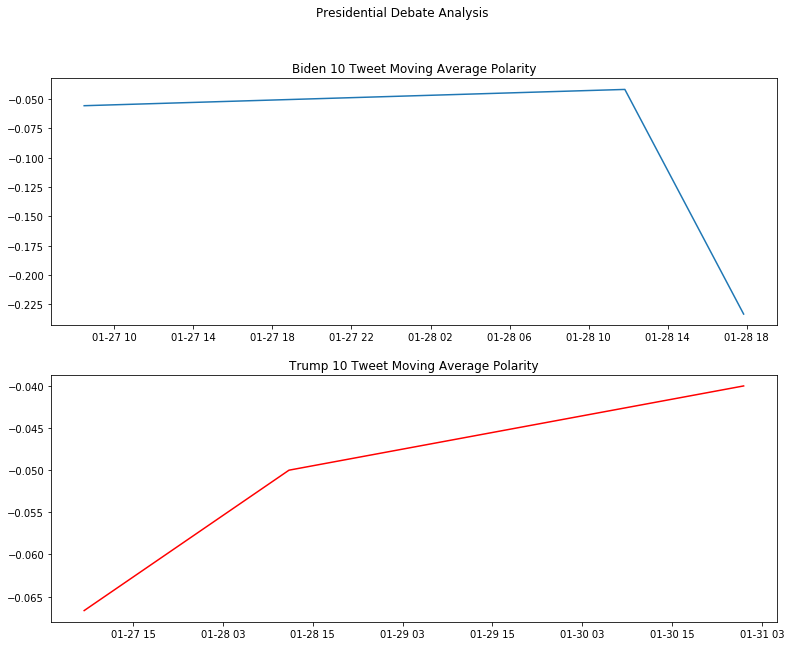

In [24]:
fig, axes = plt.subplots(2, 1, figsize=(13,10))

axes[0].plot(biden['Timestamp'], biden['MA Polarity'])
axes[0].set_title("\n".join(['Biden 10 Tweet Moving Average Polarity']))

axes[1].plot(trump['Timestamp'], trump['MA Polarity'], color='red')
axes[1].set_title("\n".join(['Trump 10 Tweet Moving Average Polarity']))

fig.suptitle('\n'.join(['Presidential Debate Analysis']), y=0.98)
plt.show()